## “机器学习”系列之SVM（支持向量机）
### 0 前言
- 支持向量机（support vector machine，常简称为SVM，又名支持向量网络）是在分类与回归分析中分析数据的监督式学习模型与相关的学习算法。给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法创建一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。SVM模型是将实例表示为空间中的点，这样映射就使得单独类别的实例被尽可能宽的明显的间隔分开。然后，将新的实例映射到同一空间，并基于它们落在间隔的哪一侧来预测所属类别。
### 1 SVM
- SVM的最核心的思想就是从输入空间（ipnut space）向一个更加高维度（feature space）的映射。与神经网络的隐含层相似，从输入向某一个中间的阶段做了一个映射，再进行分类。最本源，是一个线性分类器。如下图

![](https://ai-studio-static-online.cdn.bcebos.com/7790b2f2c4ad4c58890e76b65bfbabbbbd01f8feecd441cf87caaf261a6da6a4)

- 空间的点到超平面的距离表示方式：如下图

![](https://ai-studio-static-online.cdn.bcebos.com/807ab79766584e028878bfc4d96a4bbbfd8eba97a9974578af156828fd5f43bf)
![](https://ai-studio-static-online.cdn.bcebos.com/bd442956b7d745a6a2f1d16b1eb2a48736a322e66f5a4ab0ac49c8483f24b38e)

- 选择最优的平面：如下图

![](https://ai-studio-static-online.cdn.bcebos.com/d636639bba3b459d91b8fa516dc3df4225400ed6402e4b538c6f6a3c0150490b)

- 中间的空心大圆圈是一个未知样本，根据不同的分界面，它被分为了不同的类型。那哪一种更好呢？如下图
- B比A好，因为B将空间分割的更加无偏。因为中间的空白区域，所以A,B都看似可行并且不相同，所以无法确定分界面的方向。B基本将其均分开，A靠着蓝点和红点都很近，有很大的bias。

![](https://ai-studio-static-online.cdn.bcebos.com/daad1e1aed464a188bc7ddd963c8530838f584ca77cb4a7ea0afd67c7429e380)

- Margin：将分界面向两个方向平移至不能平移的位置（他碰到了一个点），可以平移的距离叫做Margin（间隔）。正好卡住这些分界面的点称为Support Vectors。不同方向的Margin不同，Support Vectors也不同。如下图
- 直观上说，Margin越大，容错性越强。所以，希望这个分界面的Margin越大越好。SVM就可以最大化Margin（线性支持向量机）。

![](https://ai-studio-static-online.cdn.bcebos.com/8da8dbf37cd94a0d8781acd433c2e9082ab4921614734c719c86a324d361fee6)

- Margin如何定义：上面的线定义为=1，下面的线定义为=-1（也可以令其等于正负一，因为可以进行缩放）--> 也就是说在这个分界面上方都定义为1，下方都定义为-1（用正负一来定义点的两个类型）。运用上面点到平面的公式，得到Margin的式子。如下图

![](https://ai-studio-static-online.cdn.bcebos.com/aa3bfa95efe3494fb0792771cf4d717e7d59d8ed05584fedbbd21618e5de8bb7)

### 2 SVM的options求解
- 两个目标：样本分对；最大化Margin（最小化 w乘以w的转置 ）
- 样本是两类：+1，-1（标签），+1的样本必须wx+b>=1，才是将样本分对。如下图

![](https://ai-studio-static-online.cdn.bcebos.com/a715c9292a6e434aadf48ef956bff5d74327a5b3def84d72acb8b93ad4dd8d6f)

- 拉格朗日乘数法：（拉格朗日系数：α），分别对w、b求导，结果很重要。将结果带回，得到新的目标函数（与上面的函数是对偶问题）。原问题和对偶问题一般情况下是不等价的，但在SVM情况下满足一些条件，所以是等价的。所以转为求 $L_D$ 的问题，其是由α组成的（有条件约束），简化了问题。
- 解方程，得到很多α的值。很多α都是=0的，只有少数是不等于0的，这些不等于0的是Support Vectors。因为α=0的不对w作任何contribution。随便挑选一个support vector就可以将b求出来。用多个support vectors也可以，求解完累加，再除上个数就可以。

![](https://ai-studio-static-online.cdn.bcebos.com/82aadf61b80943609a53c73f4fe14c383ad8d7b6bd9a482d89e3124c2f4395d4)
![](https://ai-studio-static-online.cdn.bcebos.com/4a57da4b220f4214a96d80ac780a3b80365ce26be0bc45178ccbb0f1ebc84619)

- 注意 $x_i,x$ 是两个向量做内积，这也是SVM的精华所在，很关键。将里面主要的运算都做成向量的内积运算。随便取了一个support vectors $x_s$，将w替换，将方程展开，两边同时乘上 $y_s$（为+1或者-1），进行化简。举例：

![](https://ai-studio-static-online.cdn.bcebos.com/13e60fc0559a4ade92994351bfb99e582990f98fcb9e490ba7c7cfb01c7b3f22)

- Soft Margin（处理噪点问题，并不是处理实际上的线性不可分）原本的情况是假设上平面就为+1，下平面就为-1。但很多情况无法做到完美分割，给你加一个允错范围。当加上它之后你可以都大于0或者小于0，就近似看为全部分对。但由于引入了允错范围，所以还要加上一个惩罚量。两组不等式引入两个拉格朗日函数，α和μ

![](https://ai-studio-static-online.cdn.bcebos.com/6a4aaa9eb9f54120b737c2f433693f3e764f5b54b4a54ff9b7ba70be26018d5d)

- 仍按原来的方式求解：引入了一个soft margin，但最终结果并没有很复杂。发现与原来的类似，只有&lt;=C不同。

![](https://ai-studio-static-online.cdn.bcebos.com/6d828a4650f647f78e86ee20a3f12c0a533fa3a679ca46ccbaf7d575bf2b08bf)


### 3 线性不可分问题下的SVM
- 基本思想：一维不可分映射为高维度（feature space），映射不唯一。

![](https://ai-studio-static-online.cdn.bcebos.com/362e8d2dca604301a21049e6339261a485f223eb626847dbb8e539ec17131ac7)
![](https://ai-studio-static-online.cdn.bcebos.com/870b4ff9bdad417bb818a174bbdce0d6a92e5658109743c4a94ead9e4a509e3f)

- 一般都是用几种固定的应设方法：从低维映射至高维，通过公式，大概含义例如有一个100维的数据，映射至5000维。

![](https://ai-studio-static-online.cdn.bcebos.com/bae0b12b0324445997d7341c5d1010628f73b373da1d4e1db3c512143a1ce60f)

- SVM中大多为向量做内积：

![](https://ai-studio-static-online.cdn.bcebos.com/d403a5580a624eaaa88ab7841a62eac39420f8ceced048d7a125f07ee9ae6861)

- Kernel Trick：高维做内积复杂度是很高的，但是存在一个表达式（核函数，Kernel），说明低维度该计算公式可以得到与高维度计算得出相同的结果，既保证的提高维度，又降低了计算复杂度。

![](https://ai-studio-static-online.cdn.bcebos.com/b967e1c2f83d49978ce85d26342a1eae4626be140ea64c95aa0d66528a71212a)
![](https://ai-studio-static-online.cdn.bcebos.com/476a5e58bc28433a833b74b89dcc7e32f538254343e846c8a6acb9847e9f2874)

- 求解w和b：（转到高维空间了，但$φ(x)$其实是不需要求得）

![](https://ai-studio-static-online.cdn.bcebos.com/3ac4738cff7149d9a506509e100f085eeee0bb6c8e3043e697403b971a6f980f)

- 发现转为高维的求解函数，仍与低维的基本一致。核函数的强悍！

![](https://ai-studio-static-online.cdn.bcebos.com/d55280aaefe04435926a90b353bb0c2c45c798f5375b4be589f171b5f14bc60d)

- 第一个是我们上面讲过的例子；第二个是高斯核函数：可以展开无数多项，所以可以映射至无穷维。String Kernel：文本转数值，转到高维空间.包含c-t，但是因为一共三个字母所以是三次方。

![](https://ai-studio-static-online.cdn.bcebos.com/df327b5b6dfe4b2f8b47e0f49a53c93387ad79803fab489a854fa13ee679569f)


### 4 自定义函数实现SVM

In [1]:
!pip install sklearn

Looking in indexes: https://mirror.baidu.com/pypi/simple/


In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    # print(data)
    return data[:,:2], data[:,-1]

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

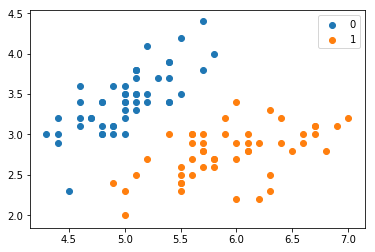

In [5]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [6]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel
    
    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0
        
        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        # 松弛变量
        self.C = 1.0
        
    def _KKT(self, i):
        y_g = self._g(i)*self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1
    
    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j]*self.Y[j]*self.kernel(self.X[i], self.X[j])
        return r
    
    # 核函数
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k]*x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k]*x2[k] for k in range(self.n)]) + 1)**2
    
        return 0
    
    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]
    
    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)
        
        for i in index_list:
            if self._KKT(i):
                continue
            
            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j
        
    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha      
    
    def fit(self, features, labels):
        self.init_args(features, labels)
        
        for t in range(self.max_iter):
            # train
            i1, i2 = self._init_alpha()
            
            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1]+self.alpha[i2]-self.C)
                H = min(self.C, self.alpha[i1]+self.alpha[i2])
            else:
                L = max(0, self.alpha[i2]-self.alpha[i1])
                H = min(self.C, self.C+self.alpha[i2]-self.alpha[i1])
                
            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(self.X[i2], self.X[i2]) - 2*self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                # print('eta <= 0')
                continue
                
            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (E2 - E1) / eta
            alpha2_new = self._compare(alpha2_new_unc, L, H)
            
            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (self.alpha[i2] - alpha2_new)
            
            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (alpha1_new-self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i1]) * (alpha2_new-self.alpha[i2])+ self.b 
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (alpha1_new-self.alpha[i1]) - self.Y[i2] * self.kernel(self.X[i2], self.X[i2]) * (alpha2_new-self.alpha[i2])+ self.b 
            
            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2
                
            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new
            
            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'
            
    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])
            
        return 1 if r > 0 else -1
    
    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)
    
    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1)*self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [7]:
svm = SVM(max_iter=200)

In [8]:
svm.fit(X_train, y_train)

'train done!'

In [9]:
svm.score(X_test, y_test)

0.92

### 5 调用sklearn.svm.SVC实现SVM
```
- C：C-SVC的惩罚参数C?默认值是1.0
C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。
- kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’    
    – 线性：u'v    
    – 多项式：(gamma*u'*v + coef0)^degree
    – RBF函数：exp(-gamma|u-v|^2)
    – sigmoid：tanh(gamma*u'*v + coef0)
- degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。
- gamma ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features
- coef0 ：核函数的常数项。对于‘poly’和 ‘sigmoid’有用。
- probability ：是否采用概率估计？.默认为False
- shrinking ：是否采用shrinking heuristic方法，默认为true
- tol ：停止训练的误差值大小，默认为1e-3
- cache_size ：核函数cache缓存大小，默认为200
- class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C
- verbose ：允许冗余输出？
- max_iter ：最大迭代次数。-1为无限制。
- decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None3
- random_state ：数据洗牌时的种子值，int值
主要调节的参数有：C、kernel、degree、gamma、coef0。
```

In [10]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
clf.score(X_test, y_test)

1.0

### 小结
- 以上是作者针对机器学习初学者理解一些做的项目笔记，不同见解欢迎各位大佬指正。
- 这一系列经常会有新的算法加入（除了临时有事），也欢迎大家催更
- 如若存在问题，可在评论区留言，作者会不时为大家讲解
- 作者aistudio主页链接，欢迎各位互粉、提问：[aistudio](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/539945)